Worked with: **Haruka and Kennedy**

In [79]:
#Importing required packages
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.mlab as mlab
import math

In [80]:
#Introducing variables
N = 10000 #number of stars given
sidebox = 400 #the distance in pc

np.random.seed(141)

In [81]:
#Gaussian
#Mean = Mv,sun = 4.64
#Std = sigma,v = 0.6 mag
coord = (np.random.random((N,3))-0.5)*sidebox
G = np.random.normal(4.64, 0.6, N)

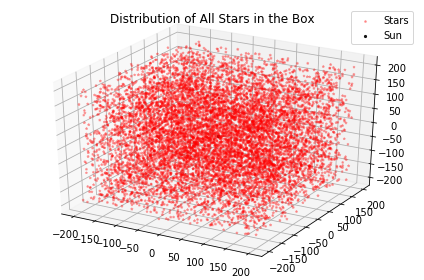

In [82]:
#Plotting the distribution of stars
fig = plt.figure()

ax = fig.add_subplot(111, projection="3d")
ax.scatter(coord[:, 0],coord[:, 1],coord[:, 2],s=G,c="r",marker="*",alpha=0.3,label="Stars",)
ax.scatter(0, 0, 0, s=4.64, c="k", marker="o",alpha=0.9, label="Sun")
ax.legend()
ax.set_title("Distribution of All Stars in the Box")
plt.tight_layout()
plt.show()

In [83]:
#x and y coordinates
x = np.logspace(1.2, np.log10(400), 20, base=10)
y = np.logspace(0, np.log10(10000), 20, base=10)

masking = np.sqrt(np.sum(coord**2,axis=1))

yy = [coord[masking < xx].shape[0] for xx in x]

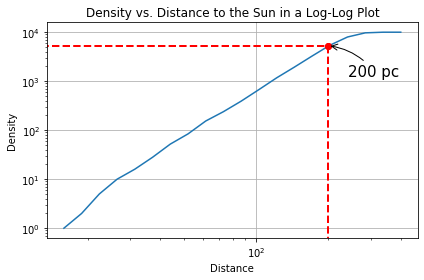

In [85]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(x, yy)
ax.set_yscale("log")
ax.set_xscale("log")
ax.set_xlabel('Distance')
ax.set_ylabel('Density')
ax.set_title("Density vs. Distance to the Sun in a Log-Log Plot")
ax.plot([200, 200], [5300, 0], "ro--", lw=2)
ax.plot([0, 200], [5300, 5300], "ro--", lw=2)
ax.annotate('200 pc',xy=(200,5300),xytext=(+20,-30),textcoords='offset points',fontsize=15,arrowprops=dict(arrowstyle='->',connectionstyle='arc3,rad=.2'))
ax.grid()
plt.tight_layout()
plt.show()

At radii > 200pc, the density of stars appears to be constant or that it reaches some sort of limit.

Text(0, 0.5, 'Absolute Magnitudes of Stars')

<Figure size 432x288 with 0 Axes>

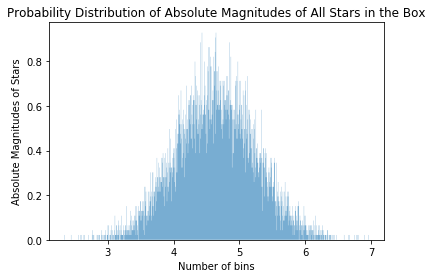

In [88]:
#Plotting the probability distribution
fig = plt.figure()
ig, ax = plt.subplots()
n, bins, patches = ax.hist(G, histtype="stepfilled", bins=1000, alpha=0.6, density=True)
ax.set_title("Probability Distribution of Absolute Magnitudes of All Stars in the Box")
ax.set_xlabel('Number of bins')
ax.set_ylabel('Absolute Magnitudes of Stars')

<Figure size 432x288 with 0 Axes>

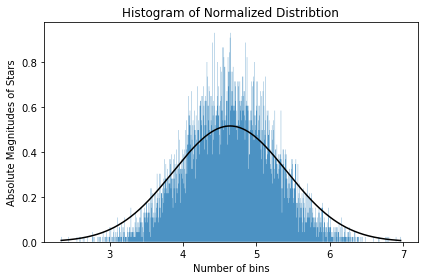

In [89]:
#Defining function of Gaussian distribution
def Gaussian(x,mu=0,sig=1):
    l = 1/(np.sqrt(2*np.pi) * np.sqrt(sig))
    r = np.exp(-(x-mu)**2/(2*sig))
    return l*r

#Plotting distribution
fig = plt.figure()
ig, ax = plt.subplots()
n, bins, patches = ax.hist(G, histtype="stepfilled", bins=1000, alpha=0.8, density=True)
y = Gaussian(bins, 4.64, 0.6)
plt.plot(bins, y, 'k-')
plt.xlabel('Number of bins')
plt.ylabel('Absolute Magnitudes of Stars')
plt.title('Histogram of Normalized Distribtion')
plt.tight_layout()
plt.show()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in double_scalars
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in true_divide
  after removing the cwd from sys.path.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in true_divide
  after removing the cwd from sys.path.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in multiply
  """


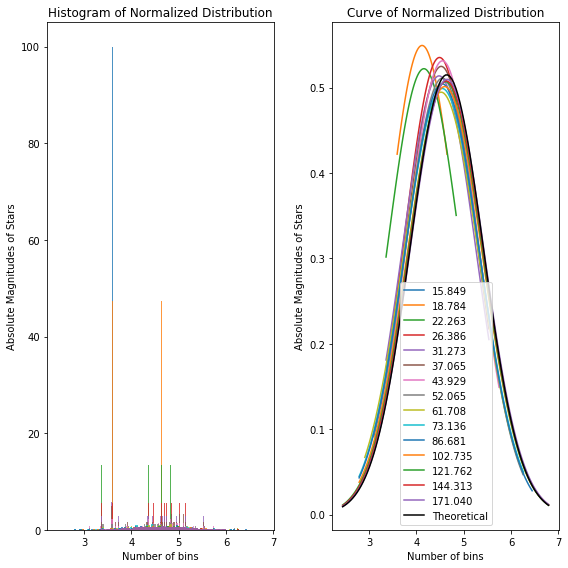

In [91]:
np.random.seed(12)

x2 = np.logspace(1.2, np.log10(400), 20, base=10)[:15]

fig = plt.figure(figsize=(8,8))
ax_1 = fig.add_subplot(121)
ax_2 = fig.add_subplot(122)

for x in x2:
    val = G[masking<x]
    n,bins,patches = ax_1.hist(val, histtype="stepfilled", bins=100, alpha=0.8, density=True)
    y = Gaussian(bins,np.mean(val),np.std(val))
    ax_2.plot(bins, y, label=f'{x:.3f}')
    
func = Gaussian(bins, 4.64, 0.6)
ax_2.plot(bins, func, 'k-', label='Theoretical')
ax_2.legend(loc='best')

ax_1.set_title('Histogram of Normalized Distribution')
ax_2.set_title('Curve of Normalized Distribution')
ax_1.set_xlabel('Number of bins')
ax_1.set_ylabel('Absolute Magnitudes of Stars')
ax_2.set_xlabel('Number of bins')
ax_2.set_ylabel('Absolute Magnitudes of Stars')
plt.tight_layout()
plt.show()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in double_scalars
  import sys
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in true_divide
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in multiply
  if __name__ == '__main__':
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in double_scalars
  import sys
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in true_divide
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in multiply
  if __name__ == '__main__':


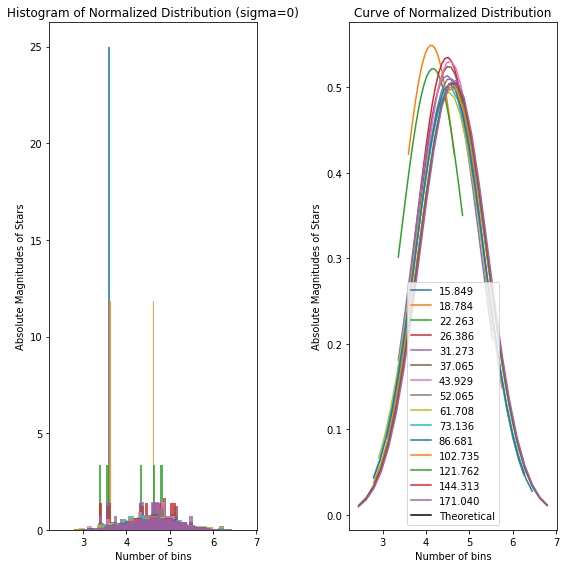

In [113]:
fig = plt.figure(figsize=(8,8))

ax_1 = fig.add_subplot(121)
ax_2 = fig.add_subplot(122)

def Gaussian2(x, mu=0, sigma=1):
    l = 1/(np.sqrt(2*np.pi)*np.sqrt(sigma))
    r = np.exp(-(x-mu)**2/(2*sigma))
    return l*r

for x in x2:
    val = G[masking < x]
    n, bins, patches = ax_1.hist(val, histtype="stepfilled", bins=25, alpha=0.8, density=True)
    y = Gaussian2(bins, np.mean(val), np.std(val))
    ax_2.plot(bins, y, label=f'{x:.3f}')

y = Gaussian2(bins, 4.64, 0)
ax_2.plot(bins, y, 'k-', label='Theoretical')
ax_2.legend()
ax_1.set_title('Histogram of Normalized Distribution (sigma=0)')
ax_2.set_title('Curve of Normalized Distribution')
ax_1.set_xlabel('Number of bins')
ax_1.set_ylabel('Absolute Magnitudes of Stars')
ax_2.set_xlabel('Number of bins')
ax_2.set_ylabel('Absolute Magnitudes of Stars')
plt.tight_layout()
plt.show()